# Wine Quality
In this project, we will analyze how wine quality correlates with wine properties (such as pH, alcohol, etc.) and visualize the relationship between them

### Exploring the data

In [1]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';') # data for red wine
red_corr = red_wine.corr()['quality'][:-1] # the correlation values between quality and the other columns
print(red_corr)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';') # data for white wine
white_corr = white_wine.corr()['quality'][:-1] # the correlation values between quality and the other columns
print(white_corr)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64


From above, wine quality and alcohol have the **strongest correlation** for both white wine and red wine (r = 0.435575 for white wine and r = 0.476166 for red wine). The correlation is positive, which means the wine quality is better if there is more alcohol. 

On the other hand, density and wine quality have the strongest negative correlation for both wine types. 

### Visualizing the data

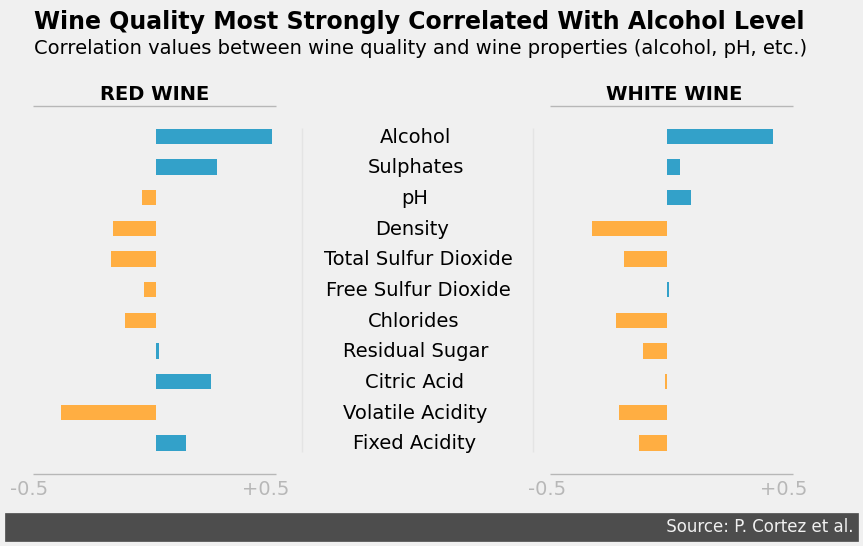

In [18]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9, 5))

positive_white = white_corr >= 0
color_map_white = positive_white.map({True:'#33A1C9', False:'#ffae42'})
ax.barh(white_corr.index, white_corr, left=2, height=0.5, color=color_map_white)


positive_red= red_corr >= 0
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'})
ax.barh(red_corr.index, red_corr, left=-0.1, height = 0.5, color=color_map_red)


ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for y_label, x_coord in x_coords.items():
    ax.text(x_coord, y_coord, y_label)
    y_coord -= 1
    
ax.axvline(0.5, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)
ax.axvline(1.45, c='grey', alpha=0.1, linewidth=1,
           ymin=0.1, ymax=0.9)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(-1, color='grey', linewidth=1, alpha=0.5,
           xmin=0.67, xmax=0.98)
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',
        color='grey', alpha=0.5)

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.01, xmax=0.32)
ax.text(-0.33, 11.2, 'RED WINE', weight='bold')

ax.axhline(11, color='grey', linewidth=1, alpha=0.5,
          xmin=0.67, xmax=0.98)
ax.text(1.75, 11.2, 'WHITE WINE', weight='bold')

ax.text(-0.7, -2.9, ' '*125 + 'Source: P. Cortez et al.', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=12)

ax.text(-0.6, 13.5,'Wine Quality Most Strongly Correlated With Alcohol Level',size=17, weight='bold')
ax.text(-0.6, 12.7,'Correlation values between wine quality and wine properties (alcohol, pH, etc.)')

plt.show()